Graph Plot


In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from itertools import cycle


def roc_plot(y_test, y_pred):

    rice = {
        0: 'Cammeo',
        1: 'Osmancik',
    }

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    colors = cycle(['red', 'blue'])

    for idx, (class_num, class_name) in enumerate(rice.items()):
        y_bin = [1 if y == class_num else 0 for y in y_test]
        y_prob = y_pred if class_num == 1 else 1 - y_pred

        fpr, tpr, _ = roc_curve(y_bin, y_prob)
        roc_auc = auc(fpr, tpr)
        color = next(colors)

        axs[idx].plot(fpr, tpr, color=color, lw=2,
                      label=f'ROC curve (area = {roc_auc:.2f})')
        axs[idx].set_xlim([-0.05, 1.05])
        axs[idx].set_ylim([0.05, 1.05])
        axs[idx].set_xlabel('False Positive Rate')
        axs[idx].set_ylabel('True Positive Rate')
        axs[idx].set_title(f'ROC {class_name}')
        axs[idx].legend(loc="lower right")

    plt.tight_layout()
    plt.show()


def cm_plot(conf_matrix):
    rice = ['Cammeo', 'Osmanscik']

    plt.figure(figsize=(8, 5))
    sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='d',
                xticklabels=rice, yticklabels=rice)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Neural Network


In [38]:
import numpy as np
import pandas as pd
import seaborn as sns

cols = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
        'Eccentricity', 'Convex_Area', 'Extent', 'Class']

data = pd.read_csv('./data/Rice_Cammeo_Osmancik.arff', names=cols)
data['Class'] = (data['Class'] == 'Osmancik').astype(int)

In [39]:
# fig, ax = plt.subplots(figsize=(6,  3))

# z_scores = np.abs((data.select_dtypes(include=[np.number]) - data.select_dtypes(
#     include=[np.number]).mean()) / data.select_dtypes(include=[np.number]).std())
# outliers = z_scores > 3

# for i, col in enumerate(z_scores.columns):
#     # Blue Z-Score
#     ax.scatter([col]*len(z_scores), z_scores[col],
#                c='b', label='Normal' if i == 0 else "")

#     # Red Z-Score
#     outlier_z_scores = z_scores.loc[outliers[col], col]

#     ax.scatter([col]*len(outlier_z_scores), outlier_z_scores,
#                c='r', label='Outlier' if i == 0 else "")

# ax.set_title('Z-Scores of Features with Outliers')
# ax.set_xlabel('Feature')
# ax.set_ylabel('Z-Score')
# ax.legend()
# plt.xticks(rotation=45)

In [40]:
from sklearn.preprocessing import StandardScaler

x = data.iloc[:, 0:7].values
y = data.iloc[:, -1]

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [41]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=.3)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=.15)

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_test = y_test.astype(int)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(7,),
          kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(.4))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(
    learning_rate=.085), metrics=['accuracy'])


model.fit(x_train, y_train, batch_size=32, epochs=30, callbacks=tf.keras.callbacks.EarlyStopping(
    monitor='loss', verbose=0), validation_data=(x_val, y_val), verbose=0)

y_pred = model.predict(x_test)

36/36 [==============================] - 0s 648us/step


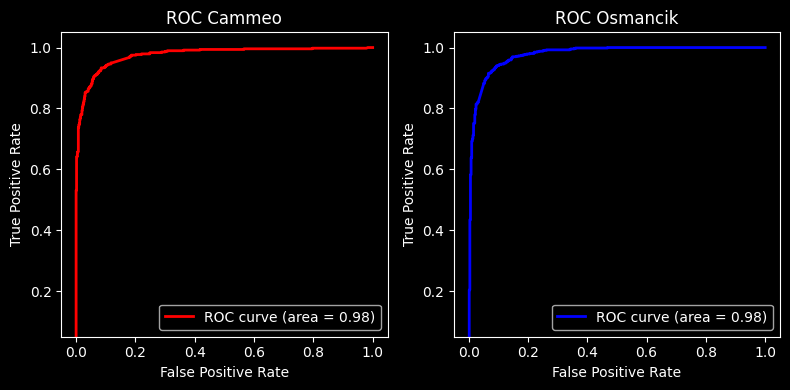

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       480
           1       0.93      0.94      0.93       663

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143

[[431  49]
 [ 39 624]]


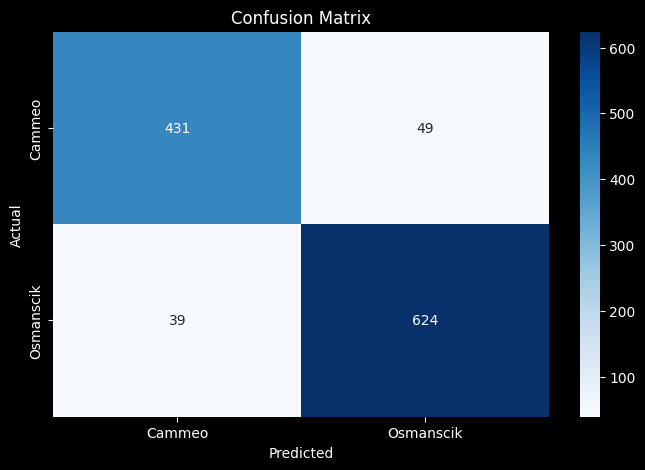

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

roc_plot(y_test, y_pred)

y_pred = (y_pred >= .5).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
cm_plot(confusion_matrix(y_test, y_pred))